In [14]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import time

In [15]:
#Loading the dataset and creating datadrame
df=pd.read_excel('/content/hr-data.xlsx')
df.head(5)

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance
0,Barr Faughny,AC0001,Male,Bachelor's Degree,2020-06-12,Chocolatier,51300,26.0,13
1,Dennison Crosswaite,AC0002,Female,Diploma,2021-02-18,Production Operator,38300,32.7,12
2,Gunar Cockshoot,AC0003,Male,High School Diploma,2022-09-05,Packaging Associate,31400,34.3,16
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,2019-11-20,Marketing Specialist,60700,29.6,21
4,Gigi Bohling,AC0005,Male,Master's Degree,2018-04-08,Research Scientist,77300,30.3,23


In [16]:
df.columns

Index(['Name', 'Emp ID', 'Gender', 'Education Qualification', 'Date of Join',
       'Job Title', 'Salary', 'Age', 'Leave Balance'],
      dtype='object')

In [17]:
df.shape

(161, 9)

In [18]:
#Multiplying 'Exchange Rate' with average column for two for the converted cost
df['Salary (INR)'] = df['Salary'] * 83.47

In [19]:
df.head(5)

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Salary (INR)
0,Barr Faughny,AC0001,Male,Bachelor's Degree,2020-06-12,Chocolatier,51300,26.0,13,4282011.0
1,Dennison Crosswaite,AC0002,Female,Diploma,2021-02-18,Production Operator,38300,32.7,12,3196901.0
2,Gunar Cockshoot,AC0003,Male,High School Diploma,2022-09-05,Packaging Associate,31400,34.3,16,2620958.0
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,2019-11-20,Marketing Specialist,60700,29.6,21,5066629.0
4,Gigi Bohling,AC0005,Male,Master's Degree,2018-04-08,Research Scientist,77300,30.3,23,6452231.0


In [20]:
#To get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Name                     161 non-null    object        
 1   Emp ID                   161 non-null    object        
 2   Gender                   161 non-null    object        
 3   Education Qualification  161 non-null    object        
 4   Date of Join             161 non-null    datetime64[ns]
 5   Job Title                161 non-null    object        
 6   Salary                   161 non-null    int64         
 7   Age                      161 non-null    float64       
 8   Leave Balance            161 non-null    int64         
 9   Salary (INR)             161 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 12.7+ KB


In [21]:
#To check for missing values
df.isnull().sum().sort_values(ascending=False)

,0
Name,0
Emp ID,0
Gender,0
Education Qualification,0
Date of Join,0
Job Title,0
Salary,0
Age,0
Leave Balance,0
Salary (INR),0


In [22]:
#TO check for duplicate data
duplicate_data = df.duplicated().any()
print(duplicate_data)

False


In [23]:
#To give stastical information about the dataset
df[['Age', 'Leave Balance', 'Salary (INR)']].describe()

,Age,Leave Balance,Salary (INR)
count,161.000000,161.000000,1.610000e+02
mean,35.204969,16.416149,4.526666e+06
std,8.602309,4.980661,1.388574e+06
min,23.500000,2.000000,2.412283e+06
25%,30.700000,14.000000,3.313759e+06
50%,32.700000,16.000000,4.265317e+06
75%,35.900000,20.000000,5.909676e+06
max,66.700000,37.000000,7.094950e+06


<Figure size 1400x1200 with 0 Axes>

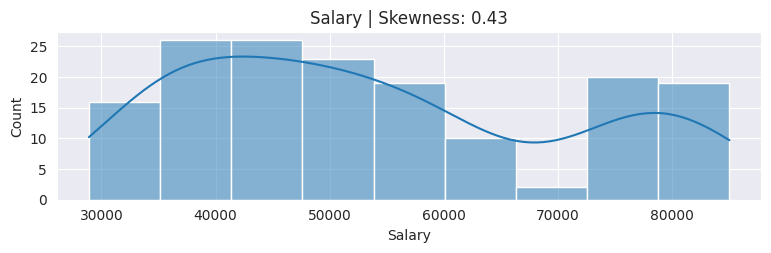

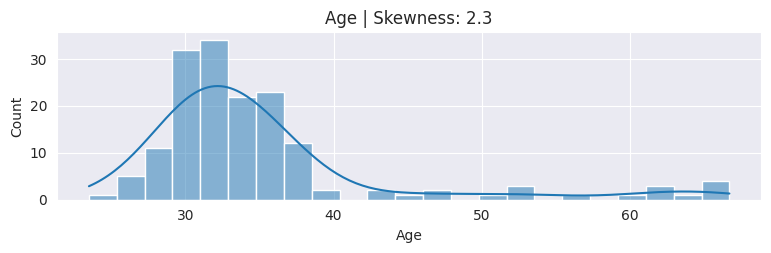

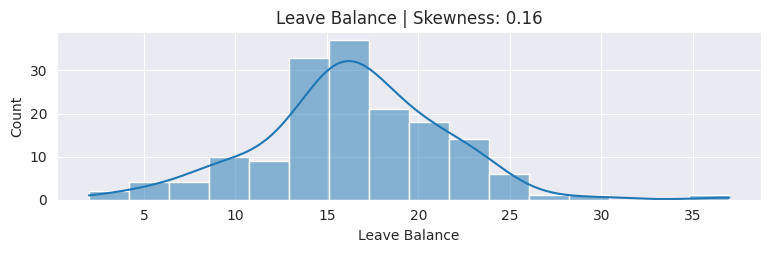

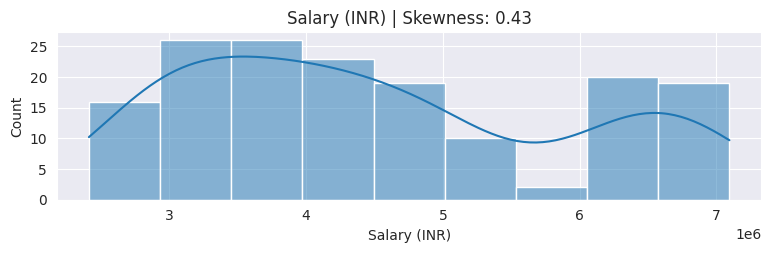

In [25]:
#To check for distribution of data
# Set Saborn style
sns.set_style('darkgrid')

#Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

#Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for i, feature in enumerate(numerical_columns, 1):
  plt.figure(figsize=(20,10))
  plt.subplot(len(numerical_columns), 2, i)
  sns.histplot(df[feature], kde=True)
  plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
plt.show()

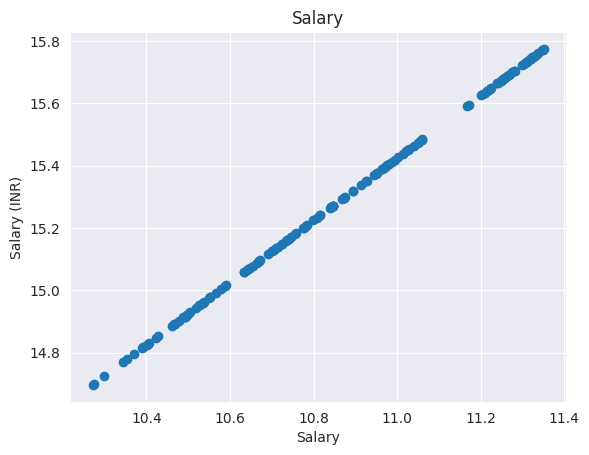

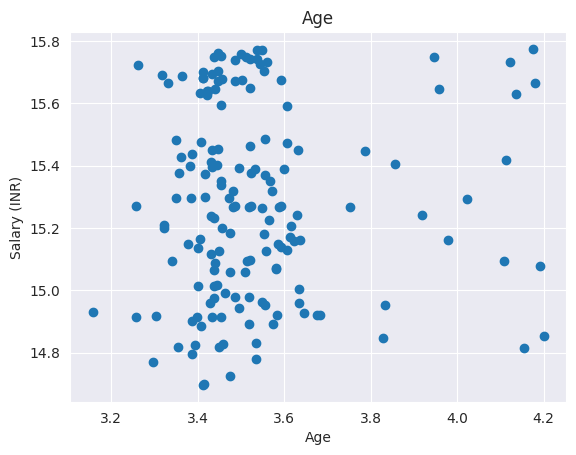

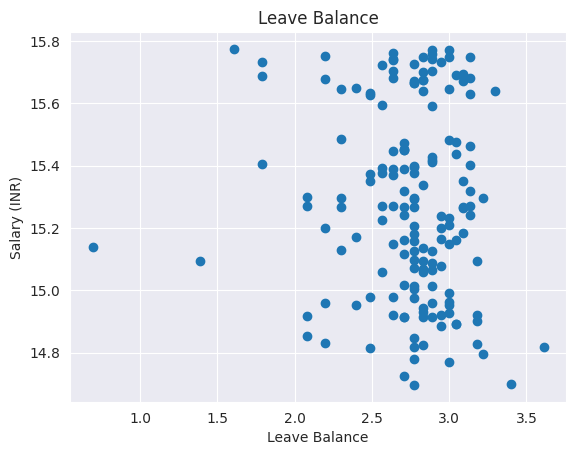

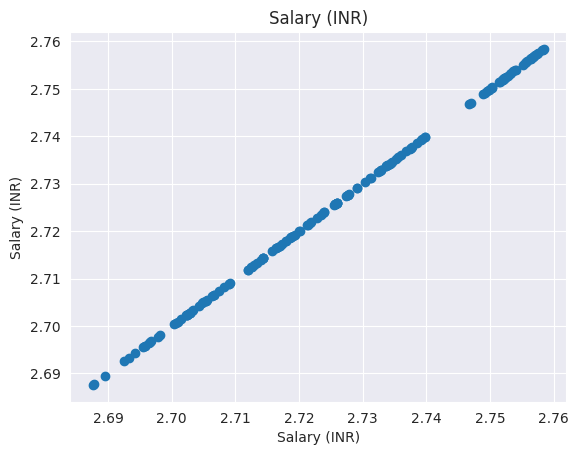

In [27]:
#Logarithmic transformation
for feature in numerical_columns:
  data=df.copy()
  data[feature]=np.log(data[feature])
  data['Salary (INR)']=np.log(data['Salary (INR)'])
  plt.scatter(data[feature], data['Salary (INR)'])
  plt.xlabel(feature)
  plt.ylabel('Salary (INR)')
  plt.title(feature)
  plt.show()

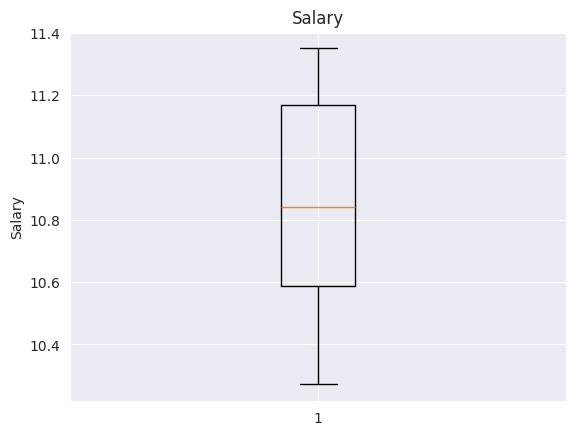

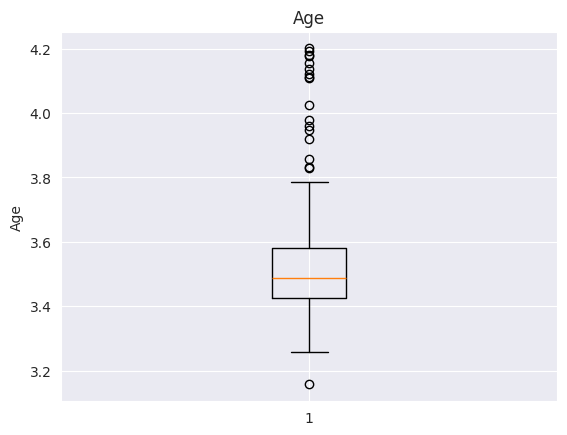

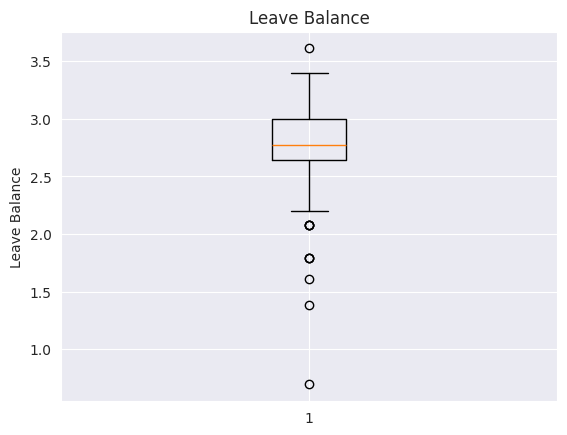

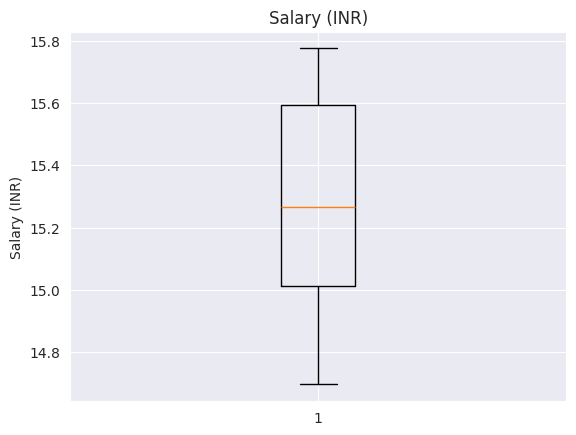

In [28]:
#Outliers
for feature in numerical_columns:
  data=df.copy()
  data[feature]=np.log(data[feature])
  plt.boxplot(data[feature])
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

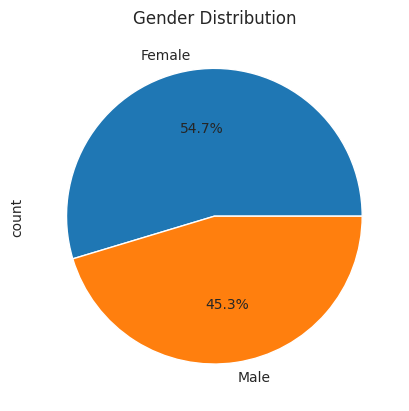

In [29]:
#Gender distribution
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', color=sns.color_palette('Spectral'))
plt.title('Gender Distribution')
plt.show()

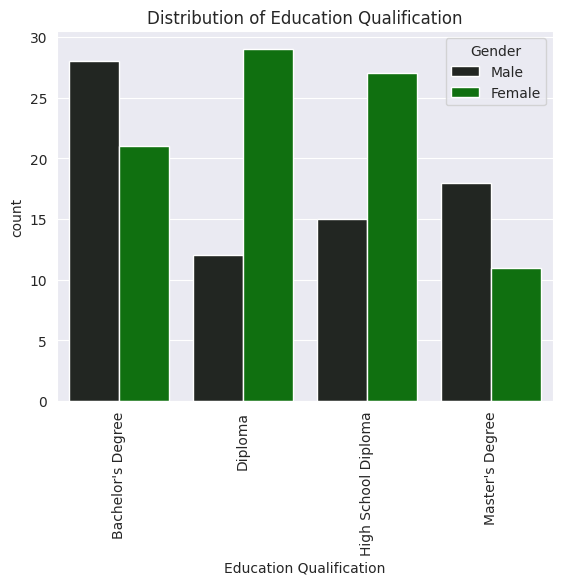

In [31]:
#Distribution of Education
sns.countplot(x='Education Qualification', data=df, hue='Gender', color='g')
plt.xticks(rotation=90)
plt.title('Distribution of Education Qualification')
plt.show()

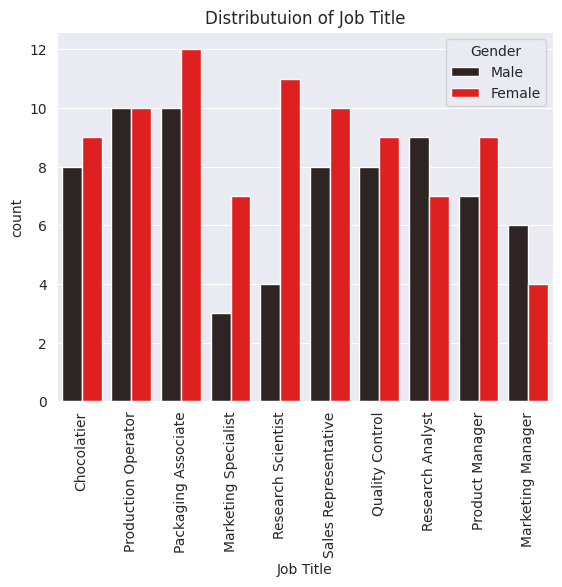

In [32]:
#Distribution of job title
sns.countplot(x='Job Title', data =df, hue='Gender', color='r')
plt.xticks(rotation=90)
plt.title('Distributuion of Job Title')
plt.show()

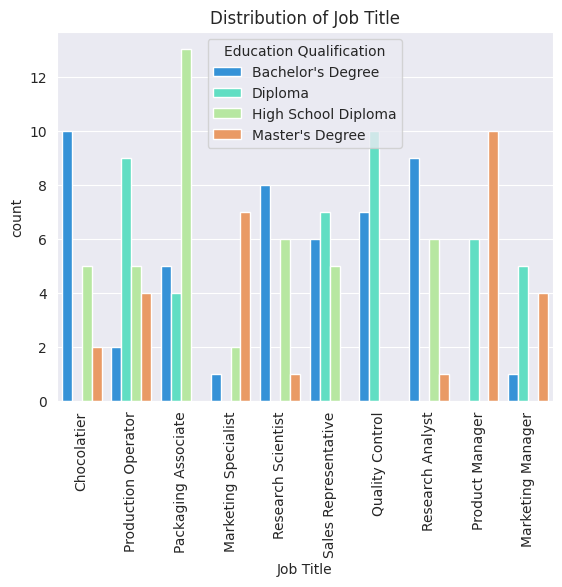

In [33]:
#Distribution of Job Title
sns.countplot(x='Job Title', hue='Education Qualification', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Distribution of Job Title')
plt.show()

Text(0.5, 1.0, 'High Paid Roles')

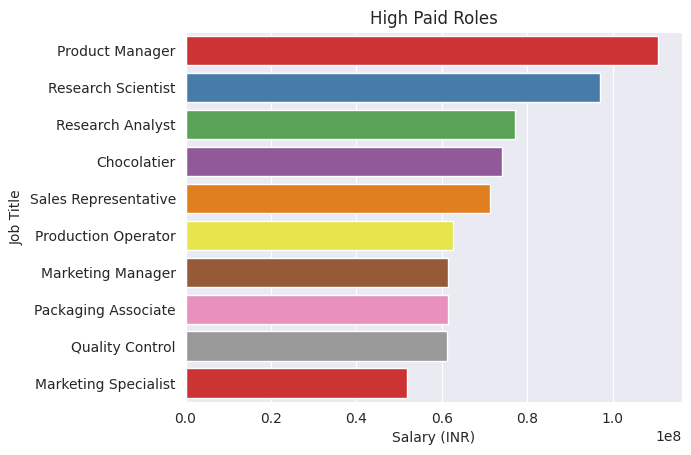

In [34]:
#High paid roles
Salary=df.groupby('Job Title')['Salary (INR)'].sum().reset_index()
Salary=Salary.sort_values(by='Salary (INR)', ascending=False)
sns.barplot(x='Salary (INR)', y='Job Title', palette='Set1', data=Salary[:10])
plt.title('High Paid Roles')

Text(0.5, 1.0, 'Salary vs Educational Qualification')

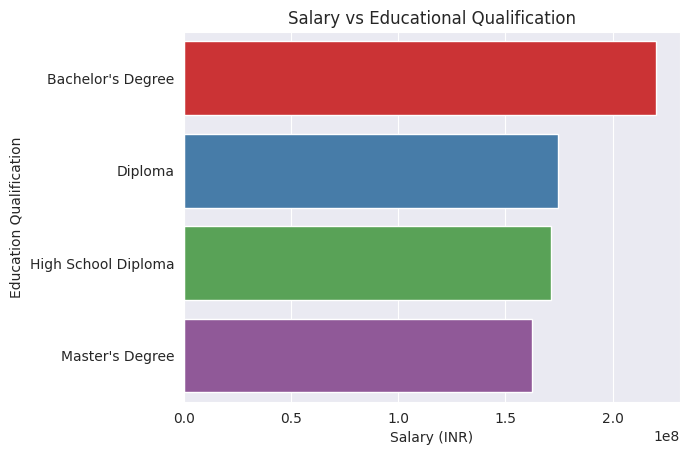

In [35]:
#Salary vs Education Qualification
Salary=df.groupby('Education Qualification')['Salary (INR)'].sum().reset_index()
Salary=Salary.sort_values(by='Salary (INR)', ascending=False)
sns.barplot(x='Salary (INR)', y='Education Qualification', palette='Set1', data=Salary)
plt.title('Salary vs Educational Qualification')

Text(0.5, 1.0, 'Salary vs Gender')

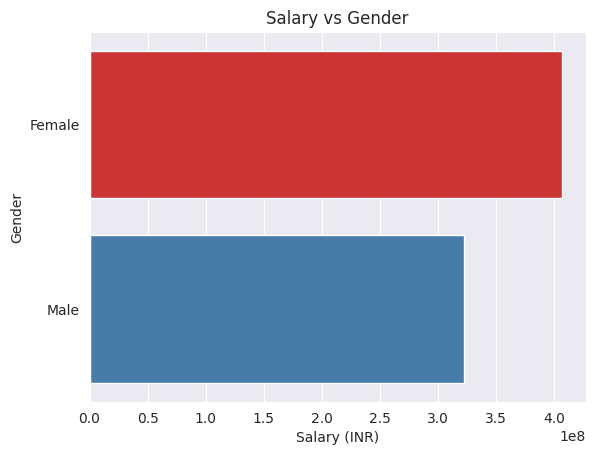

In [36]:
#Salary vs Gender
Salary=df.groupby('Gender')['Salary (INR)'].sum().reset_index()
Salary=Salary.sort_values(by='Salary (INR)', ascending=False)
sns.barplot(x='Salary (INR)', y='Gender', palette='Set1', data=Salary)
plt.title('Salary vs Gender')

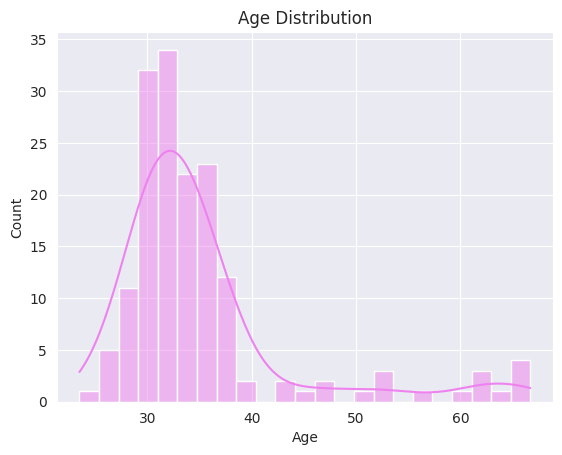

In [37]:
#Age Disribution
sns.histplot(df['Age'],kde=True, color='violet')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

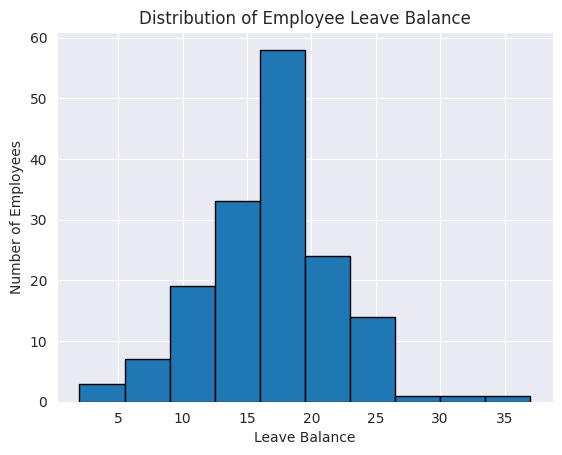

In [38]:
#Distribution of Leave balance
plt.hist(data['Leave Balance'], bins=10, edgecolor='black')
plt.xlabel('Leave Balance')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Leave Balance')
plt.show()

In [40]:
#Extract year and month
df['year'] = pd.to_datetime(df['Date of Join'], format='%d-%b-%y').dt.year
df['month'] = pd.to_datetime(df['Date of Join'], format='%d-%b-%y').dt.month

print(df)

                    Name  Emp ID  Gender Education Qualification Date of Join  \
0           Barr Faughny  AC0001    Male       Bachelor's Degree   2020-06-12   
1    Dennison Crosswaite  AC0002  Female                 Diploma   2021-02-18   
2        Gunar Cockshoot  AC0003    Male     High School Diploma   2022-09-05   
3         Wilone O'Kielt  AC0004  Female       Bachelor's Degree   2019-11-20   
4           Gigi Bohling  AC0005    Male         Master's Degree   2018-04-08   
..                   ...     ...     ...                     ...          ...   
156      Michael Walkson  AC0157    Male         Master's Degree   2017-11-26   
157        Anaya Agarwal  AC0158  Female     High School Diploma   2023-04-09   
158          Krish Rawat  AC0159    Male                 Diploma   2020-06-02   
159          Siya Sharma  AC0160  Female       Bachelor's Degree   2019-08-26   
160        Kabir Trivedi  AC0161    Male     High School Diploma   2022-03-19   

                Job Title  

In [41]:
df.head(5)

,Name,Emp ID,Gender,Education Qualification,Date of Join,Job Title,Salary,Age,Leave Balance,Salary (INR),year,month
0,Barr Faughny,AC0001,Male,Bachelor's Degree,2020-06-12,Chocolatier,51300,26.0,13,4282011.0,2020,6
1,Dennison Crosswaite,AC0002,Female,Diploma,2021-02-18,Production Operator,38300,32.7,12,3196901.0,2021,2
2,Gunar Cockshoot,AC0003,Male,High School Diploma,2022-09-05,Packaging Associate,31400,34.3,16,2620958.0,2022,9
3,Wilone O'Kielt,AC0004,Female,Bachelor's Degree,2019-11-20,Marketing Specialist,60700,29.6,21,5066629.0,2019,11
4,Gigi Bohling,AC0005,Male,Master's Degree,2018-04-08,Research Scientist,77300,30.3,23,6452231.0,2018,4


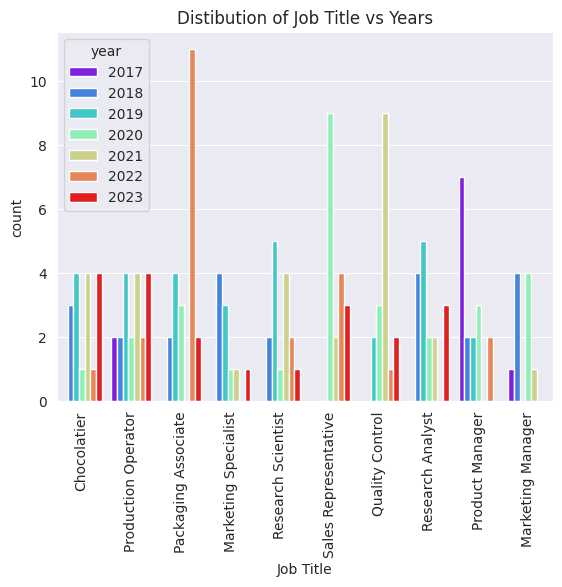

In [44]:
#Distribution of Job Title vs years
sns.countplot(x='Job Title', hue='year', data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.title('Distibution of Job Title vs Years')
plt.show()

<Axes: >

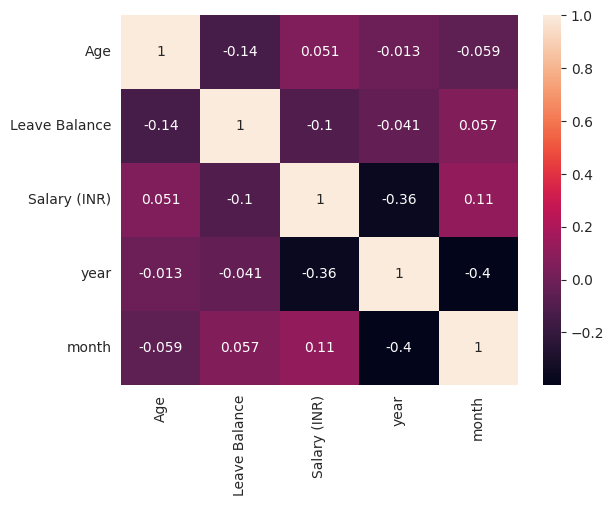

In [45]:
#Correction between numerical variables
df_corr=df[['Age', 'Leave Balance', 'Salary (INR)', 'year', 'month']].dropna().corr()
sns.heatmap(df_corr, annot=True)

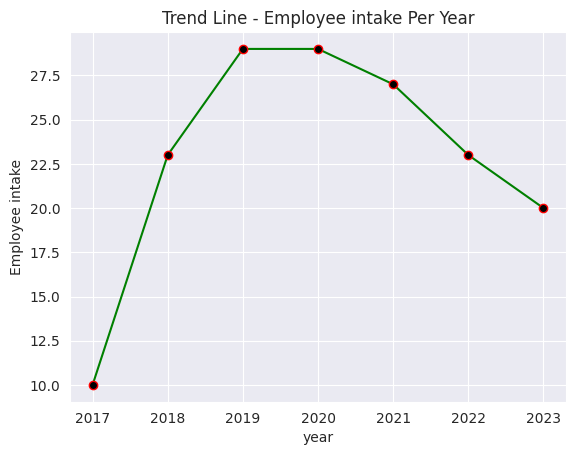

In [46]:
#To analyze the trend of Employee intake per year
sns.set_style('darkgrid')
df['year'].value_counts().sort_index().plot(kind='line', marker='o', color='g', mec='r', mfc='black')
plt.xlabel('year')
plt.ylabel('Employee intake')
plt.title('Trend Line - Employee intake Per Year')
plt.show()

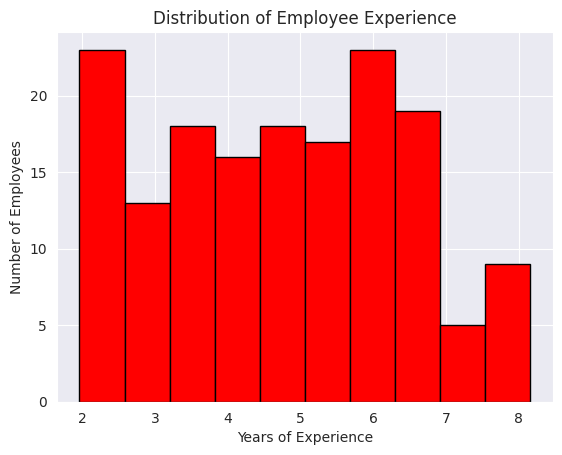

In [47]:
df['Date of Join'] = pd.to_datetime(df['Date of Join'], format='%d-%b-%y')
today = datetime.today()
df['Experience'] = (today - df['Date of Join']) / pd.Timedelta(days=365)

#Distribution of Experience
plt.hist(df['Experience'], bins=10, edgecolor='black', color='r')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Experience')
plt.show()

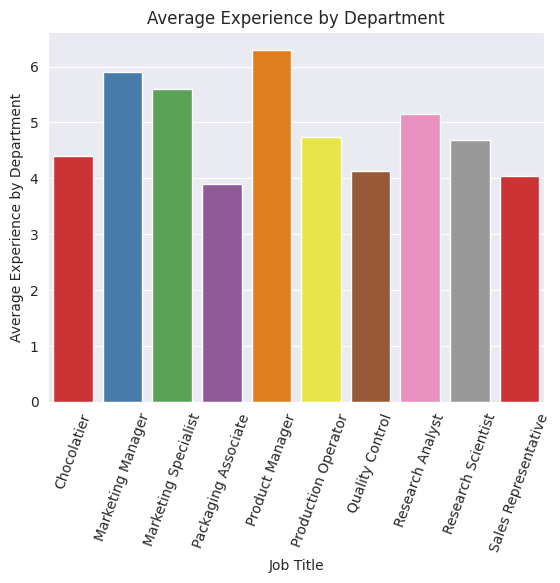

In [48]:
#Average Experience by Department
avg_experience_by_dept = df.groupby('Job Title')['Experience'].mean()
sns.barplot(x=avg_experience_by_dept.index, y=avg_experience_by_dept.values, palette='Set1')
plt.xlabel('Job Title')
plt.ylabel('Average Experience by Department')
plt.title('Average Experience by Department')
plt.xticks(rotation=70)
plt.show()

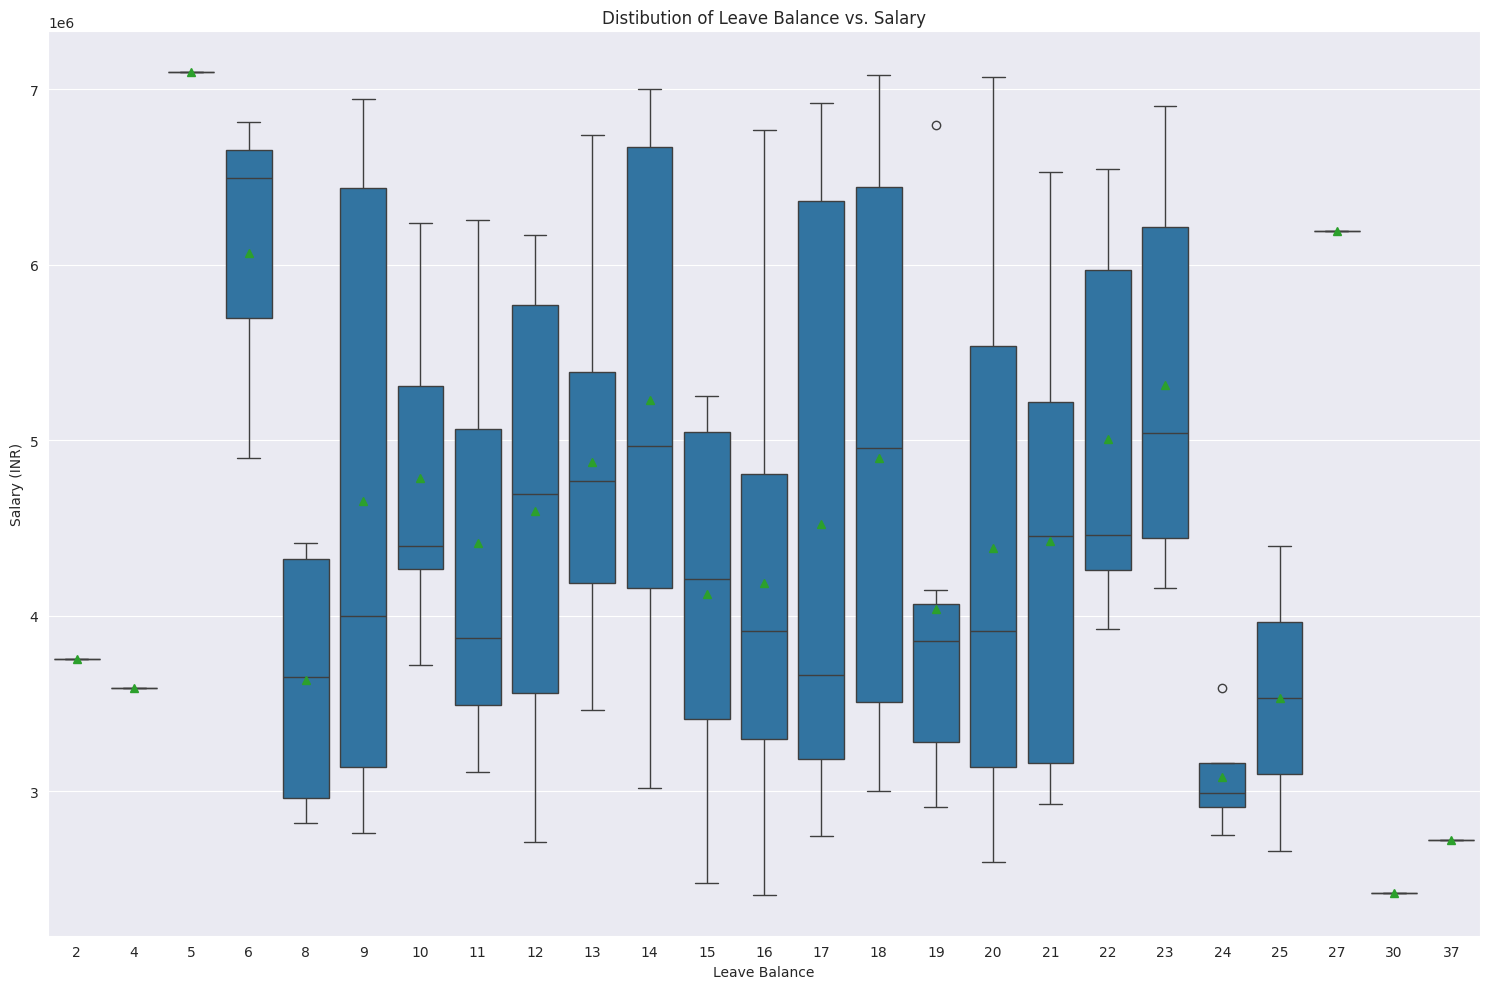

In [49]:
#Distribution of Leave Balance vs. Salary
plt.figure(figsize=(15,10))
sns.boxplot(x='Leave Balance', y='Salary (INR)', showmeans=True, data=df)
plt.xlabel('Leave Balance')
plt.ylabel('Salary (INR)')
plt.title('Distibution of Leave Balance vs. Salary')
plt.tight_layout()
plt.show()